In [17]:
import pandas as pd
import numpy as np
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import seaborn as sns

warnings.filterwarnings(action='ignore')

In [31]:
# 데이터 경로
data_path = 'data/'

train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

In [ ]:
train

In [8]:
def resumetable(df):
    print(f'데이터 세트 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary['결측값 개수'] = (df == -1).sum().values # 피처별 -1 개수
    summary['고윳값 개수'] = df.nunique().values
    summary['데이터 종류'] = None
    for col in df.columns:
        if 'bin' in col or col == 'target':
            summary.loc[col, '데이터 종류'] = '이진형'
        elif 'cat' in col:
            summary.loc[col, '데이터 종류'] = '명목형'
        elif df[col].dtype == np.float64:
            summary.loc[col, '데이터 종류'] = '연속형'
        elif df[col].dtype == np.int64:
            summary.loc[col, '데이터 종류'] = '순서형'

    return summary

In [9]:
summary = resumetable(train)
summary

데이터 세트 형상: (595212, 58)


,데이터 타입,결측값 개수,고윳값 개수,데이터 종류
target,int64,0,2,이진형
ps_ind_01,int64,0,8,순서형
ps_ind_02_cat,int64,216,5,명목형
ps_ind_03,int64,0,12,순서형
ps_ind_04_cat,int64,83,3,명목형
ps_ind_05_cat,int64,5809,8,명목형
ps_ind_06_bin,int64,0,2,이진형
ps_ind_07_bin,int64,0,2,이진형
ps_ind_08_bin,int64,0,2,이진형
ps_ind_09_bin,int64,0,2,이진형


In [18]:
def plot_target_ratio_by_features(df, features, num_rows, num_cols, 
                                  size=(12, 18)):
    mpl.rc('font', size=9) 
    plt.figure(figsize=size)                     # 전체 Figure 크기 설정
    grid = gridspec.GridSpec(num_rows, num_cols) # 서브플롯 배치
    plt.subplots_adjust(wspace=0.3, hspace=0.3)  # 서브플롯 좌우/상하 여백 설정

    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        # ax축에 고윳값별 타깃값 1 비율을 막대 그래프로 그리기
        sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)

### 이진 데이터(bin)

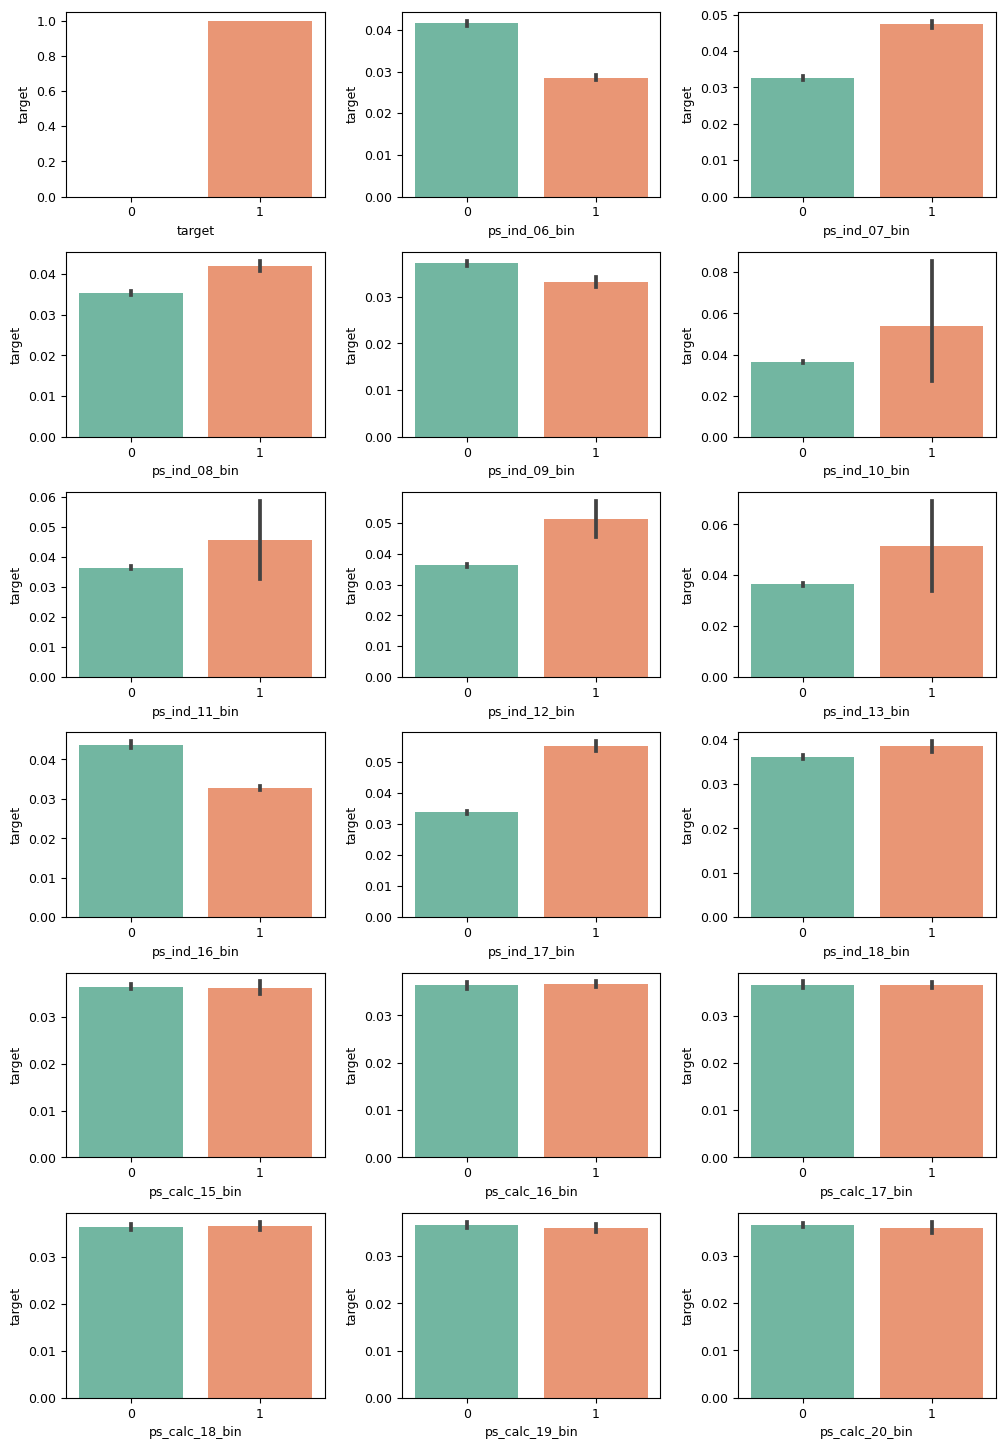

In [19]:
bin_features = summary[summary['데이터 종류'] == '이진형'].index # 이진 피처
# 이진 피처 고윳값별 타깃값 1 비율을 막대 그래프로 그리기
plot_target_ratio_by_features(train, bin_features, 6, 3) # 6행 3열 배치

### 명목 데이터(cat)

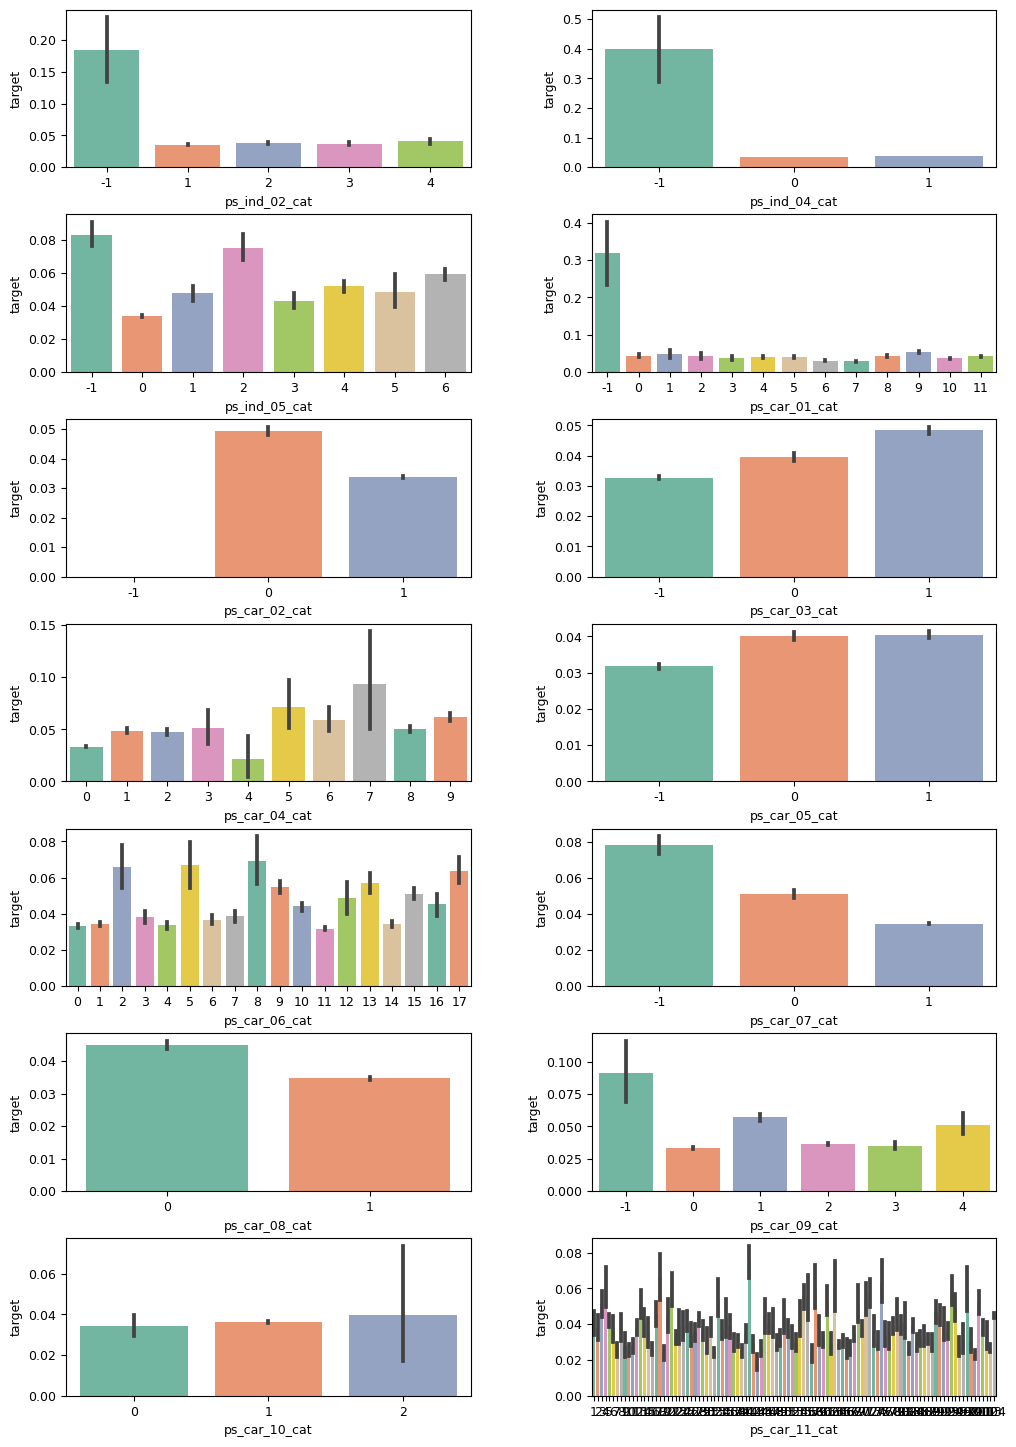

In [20]:
nom_features = summary[summary['데이터 종류'] == '명목형'].index # 명목형 피처

plot_target_ratio_by_features(train, nom_features, 7, 2) # 7행 2열

### 순서형(int)

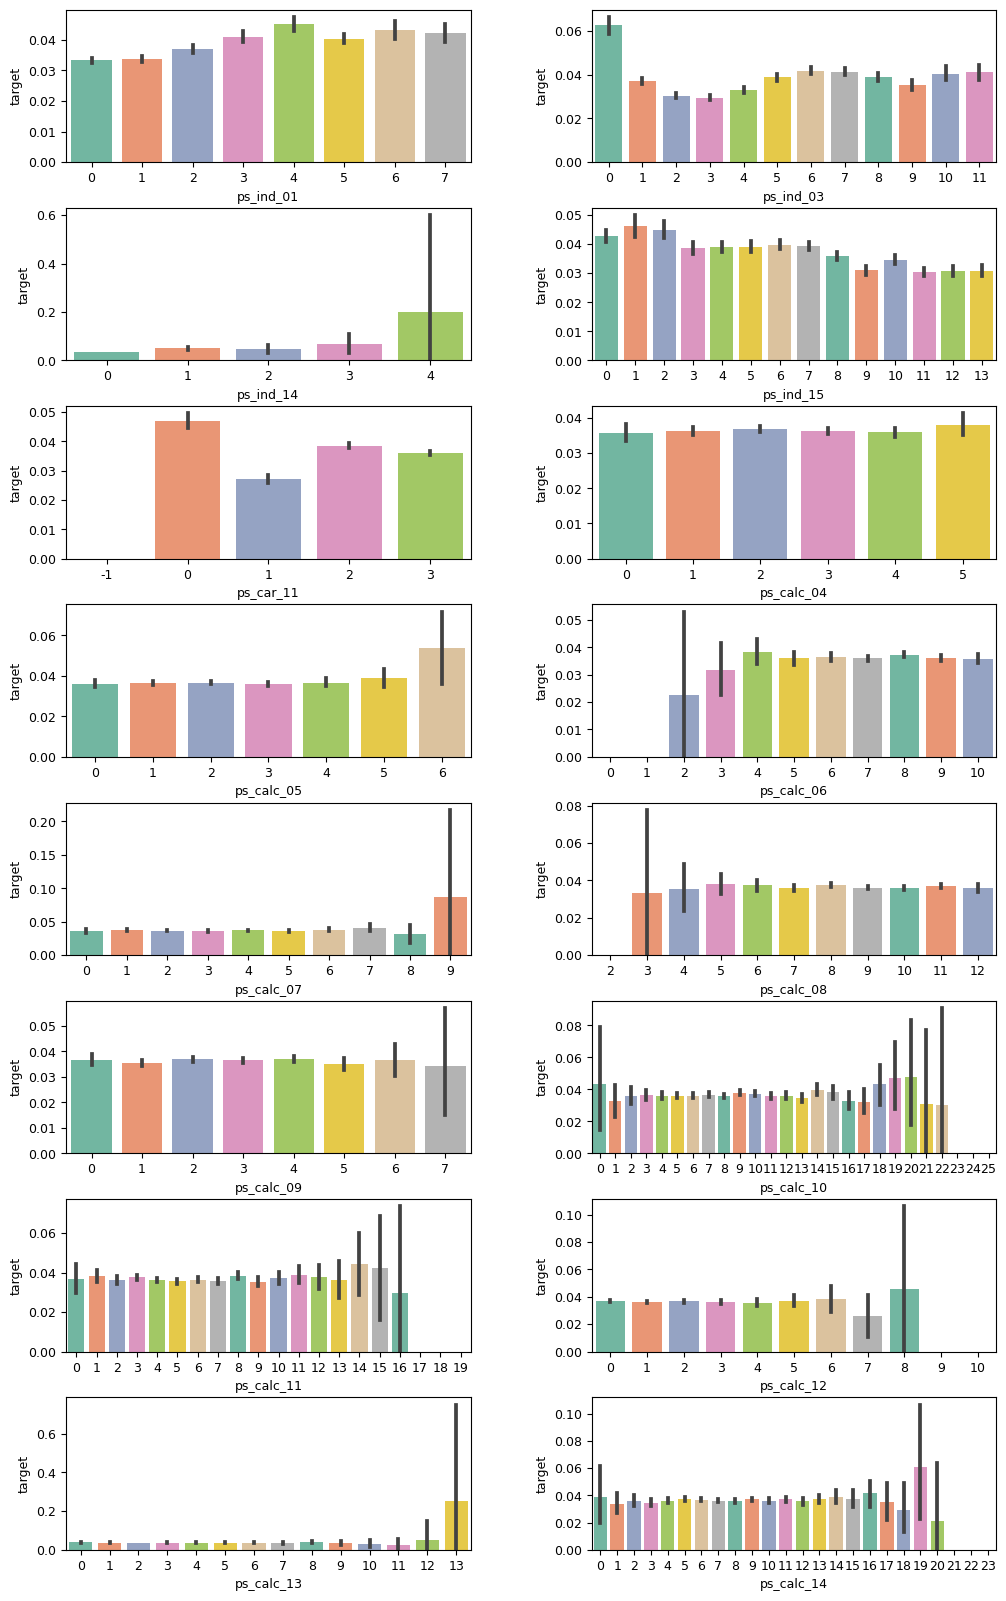

In [21]:
ord_features = summary[summary['데이터 종류'] == '순서형'].index # 순서형 피처

plot_target_ratio_by_features(train, ord_features, 8, 2, (12, 20)) # 8행 2열

### 연속형(float)

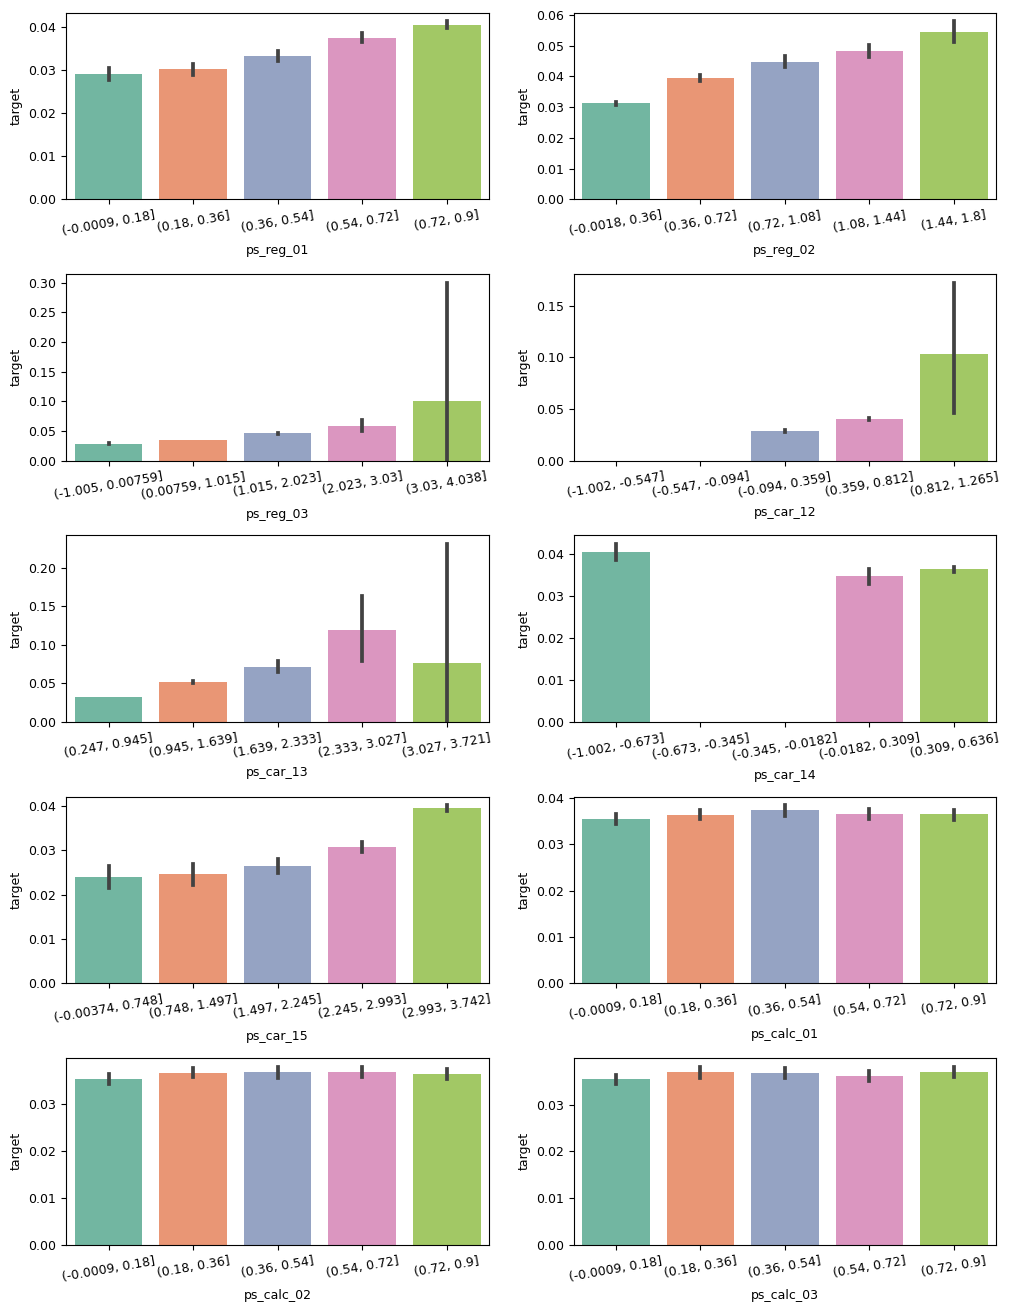

In [22]:
cont_features = summary[summary['데이터 종류'] == '연속형'].index # 연속형 피처

plt.figure(figsize=(12, 16))                # Figure 크기 설정
grid = gridspec.GridSpec(5, 2)              # GridSpec 객체 생성
plt.subplots_adjust(wspace=0.2, hspace=0.4) # 서브플롯 간 여백 설정
train_cont = train[cont_features].copy()
for idx, cont_feature in enumerate(cont_features):
    # 값을 5개 구간으로 나누기
    train_cont[cont_feature] = pd.cut(train_cont[cont_feature], 5)

    ax = plt.subplot(grid[idx])                # 분포도를 그릴 서브플롯 설정
    sns.barplot(x=cont_feature, y='target', data=train_cont, palette='Set2', ax=ax)
    ax.tick_params(axis='x', labelrotation=10) # x축 라벨 회전

### 연속형 히트맵

<Axes: >

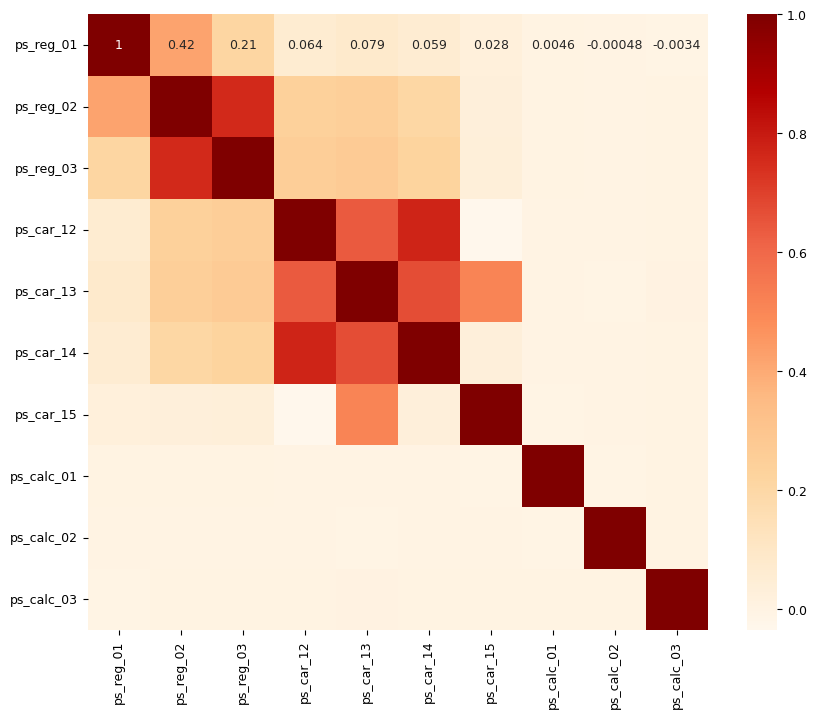

In [40]:
train_copy = train.copy().replace(-1, np.NaN)
train_copy.dropna(inplace=True) # np.NaN 값 삭제
plt.figure(figsize=(10, 8))
cont_corr = train_copy[cont_features].corr()     # 연속형 피처 간 상관관계 
sns.heatmap(cont_corr, annot=True, cmap='OrRd')  # 히트맵 그리기

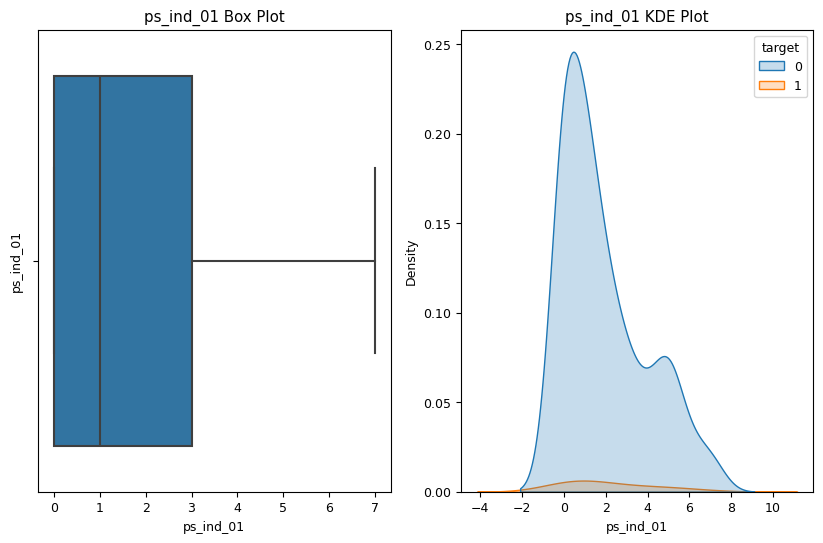

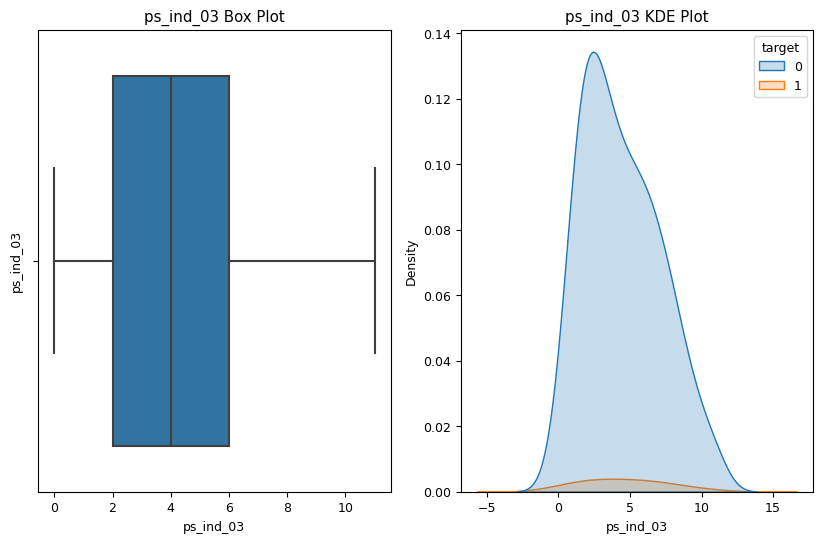

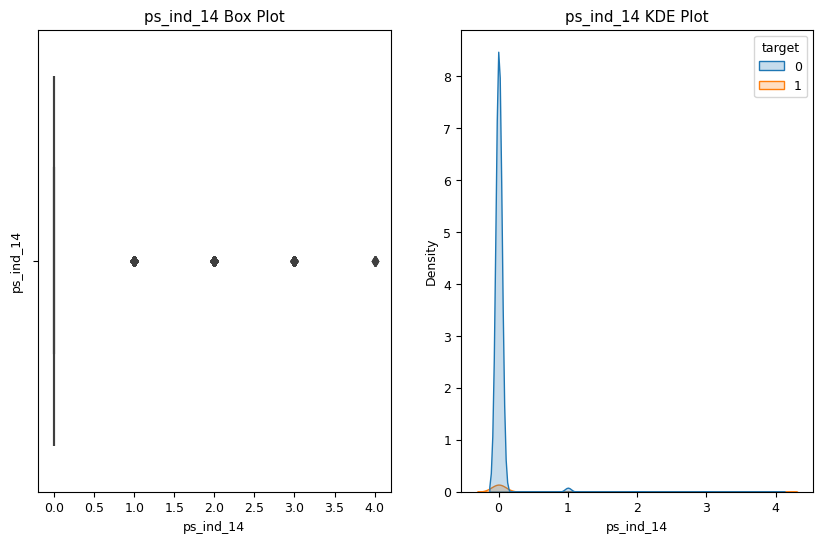

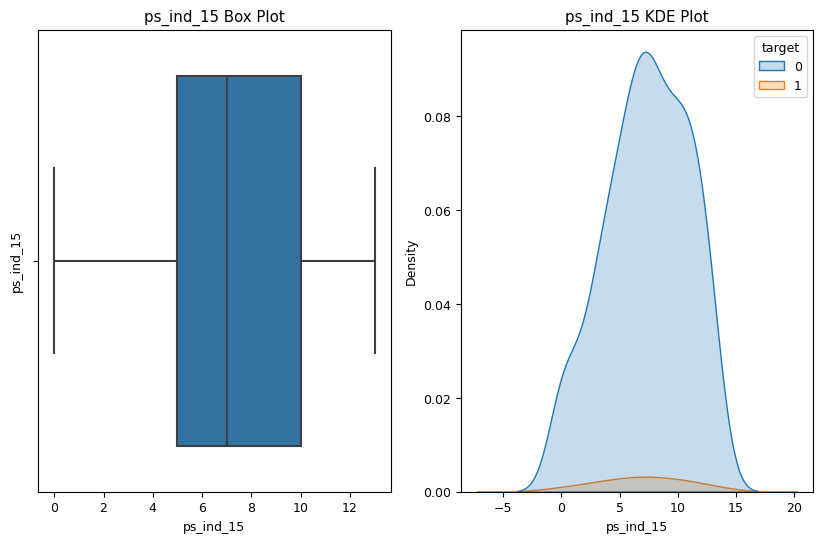

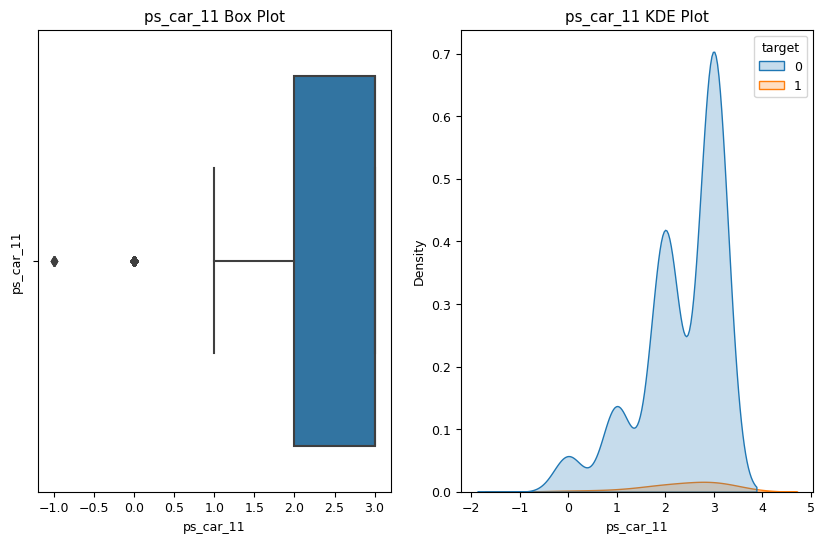

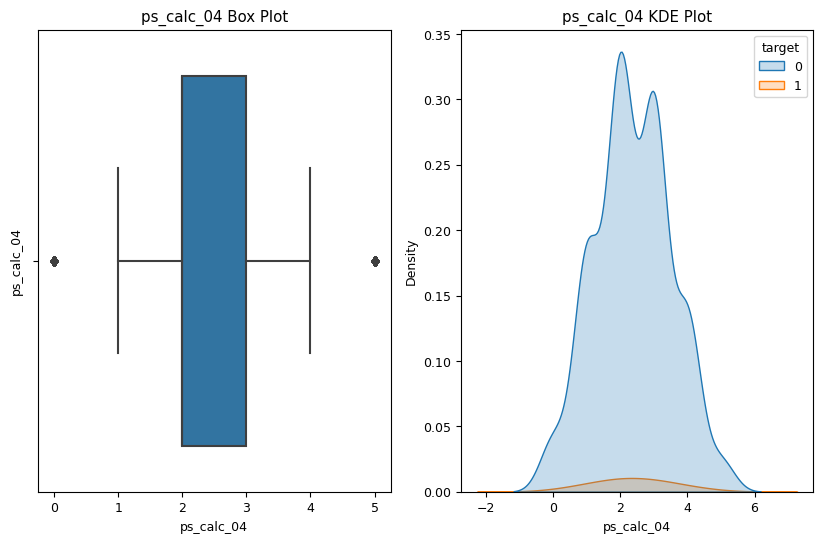

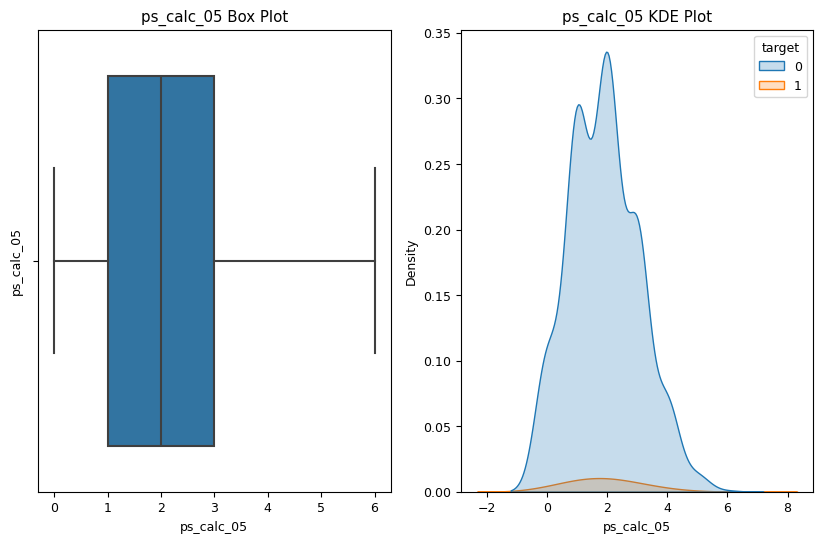

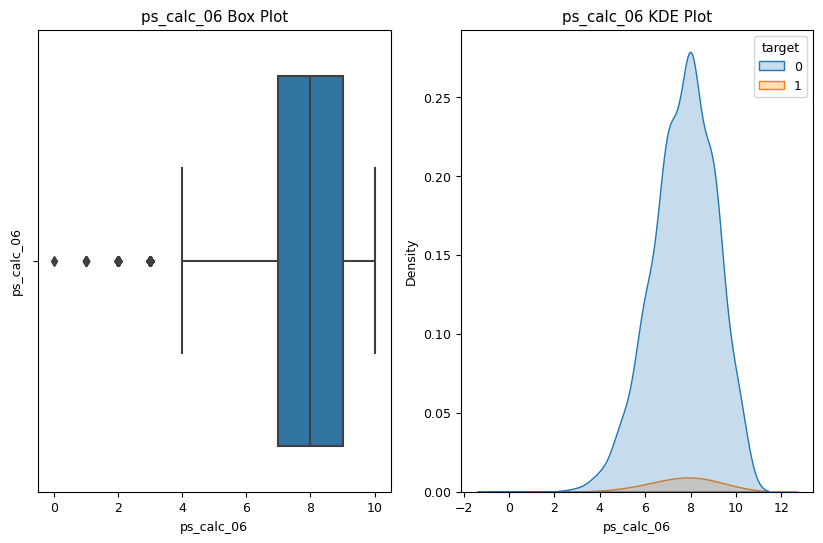

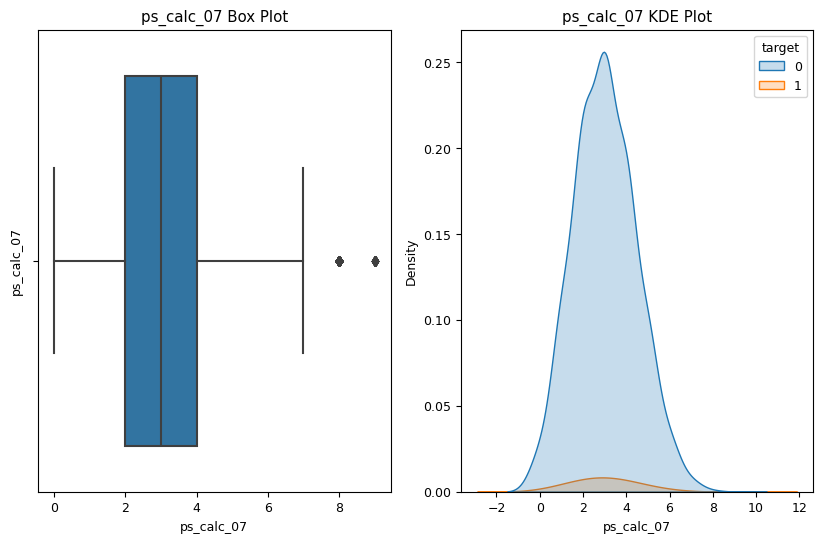

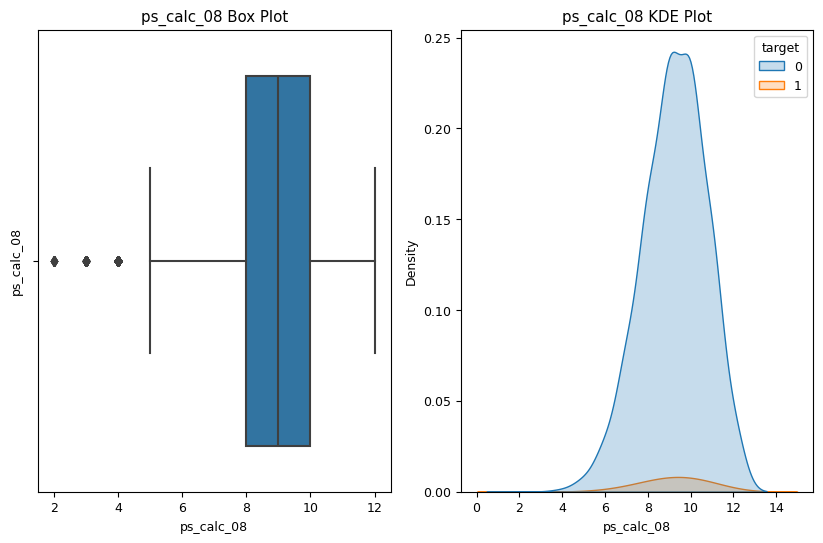

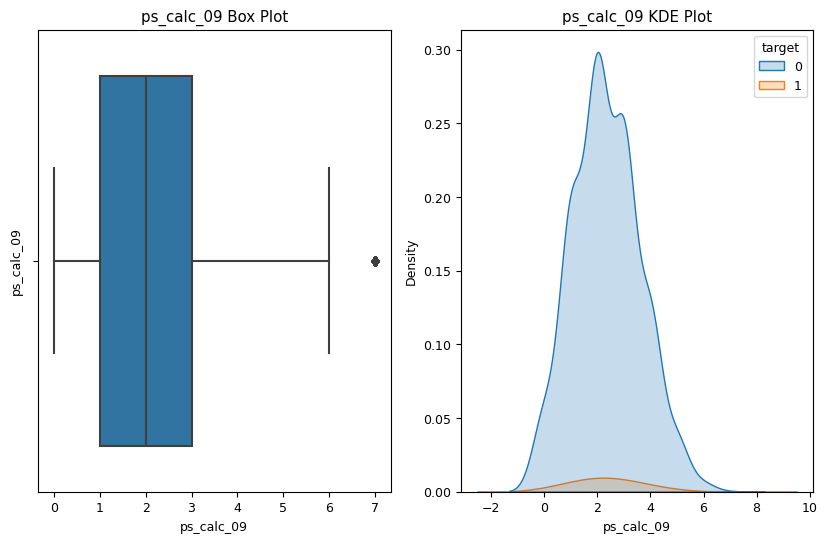

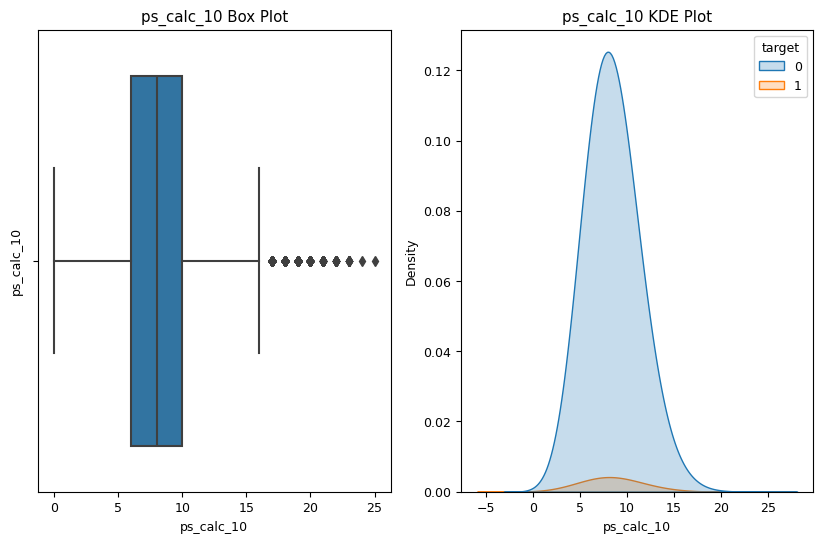

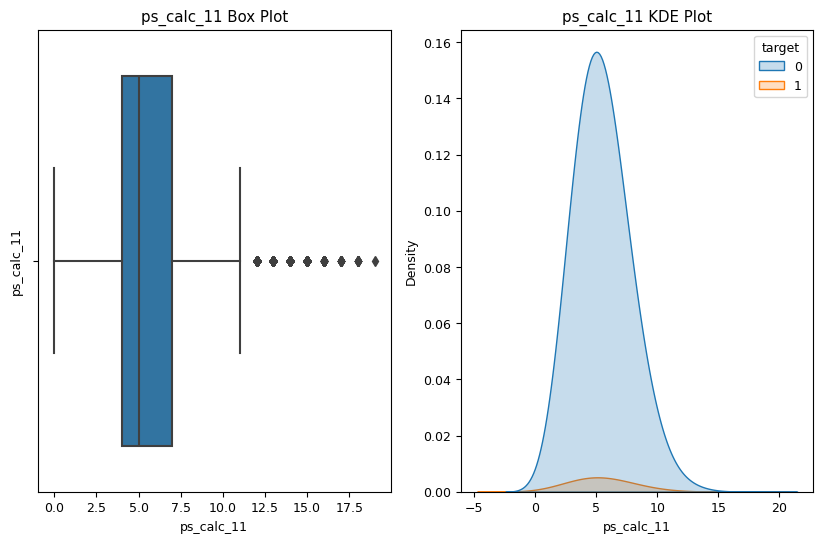

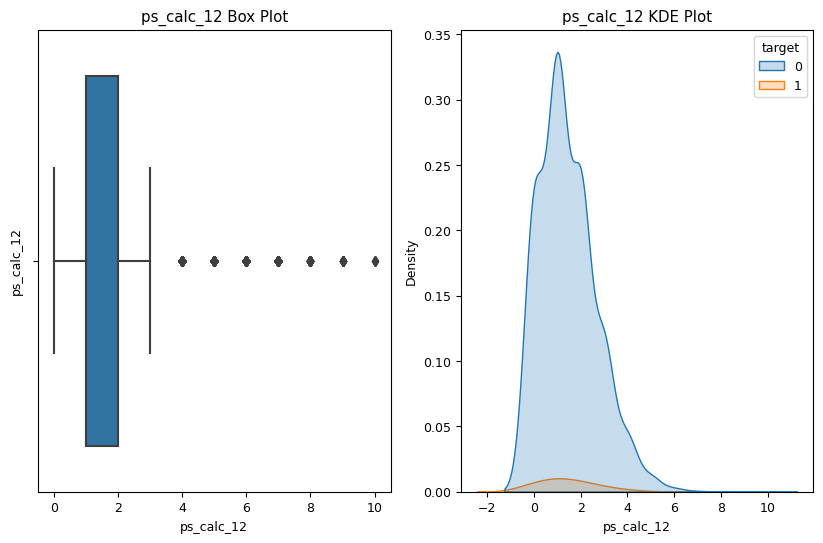

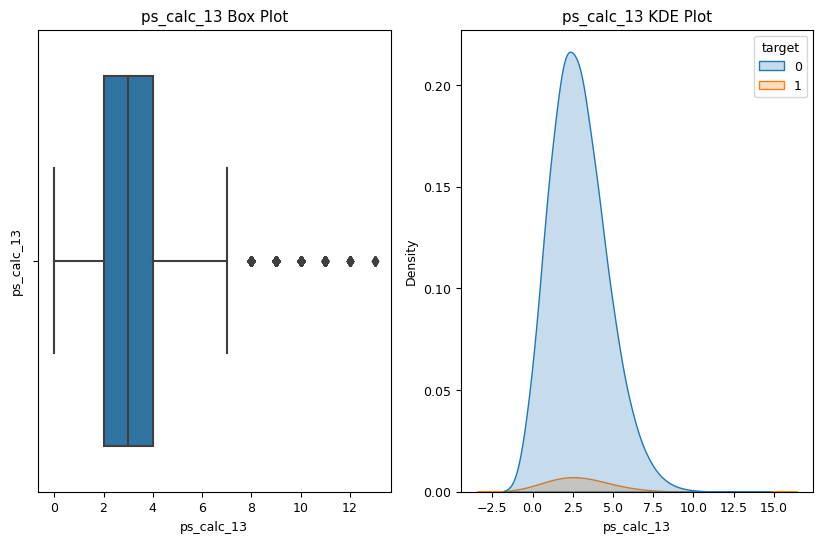

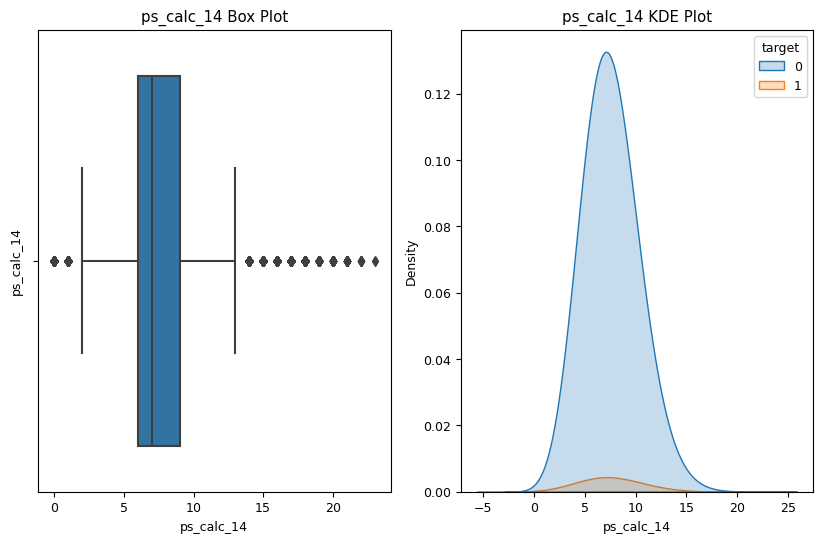

In [52]:
for ord_feature in ord_features:
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.boxplot(data=train, x=ord_feature, hue='target')

    plt.title(f"{ord_feature} Box Plot")
    plt.ylabel(ord_feature)

    plt.subplot(1,2,2)
    sns.kdeplot(data=train, x=ord_feature, fill=True, hue='target', bw_adjust=5)
    plt.title(f"{ord_feature} KDE Plot")
    plt.xlabel(ord_feature)
    plt.ylabel("Density")
    plt.savefig(f"plots/{ord_feature} Plot.png")
    plt.show()